## Iris classification 
## Steps
    > Importing Libraries

    > Read Data

    > Data Preprocessing
   
    > Feature Engineering

    > Model Training
## Importing the libraries

In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib as jb
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Read data 

In [96]:
# increase the default column SIZE
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [97]:
Iris=pd.read_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/Raw/train.csv')
Iris 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,58,4.9,2.4,3.3,1.0,Iris-versicolor
1,66,6.7,3.1,4.4,1.4,Iris-versicolor
2,92,6.1,3.0,4.6,1.4,Iris-versicolor
3,25,4.8,3.4,1.9,0.2,Iris-setosa
4,148,6.5,3.0,5.2,2.0,Iris-virginica
5,135,6.1,2.6,5.6,1.4,Iris-virginica
6,134,6.3,2.8,5.1,1.5,Iris-virginica
7,111,6.5,3.2,5.1,2.0,Iris-virginica
8,130,7.2,3.0,5.8,1.6,Iris-virginica
9,146,6.7,3.0,5.2,2.3,Iris-virginica


# Data Preprocessing

In [98]:
#information about a DataFrame
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             75 non-null     int64  
 1   SepalLengthCm  75 non-null     float64
 2   SepalWidthCm   75 non-null     float64
 3   PetalLengthCm  75 non-null     float64
 4   PetalWidthCm   75 non-null     float64
 5   Species        75 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [99]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,58,4.9,2.4,3.3,1.0,Iris-versicolor
1,66,6.7,3.1,4.4,1.4,Iris-versicolor
2,92,6.1,3.0,4.6,1.4,Iris-versicolor
3,25,4.8,3.4,1.9,0.2,Iris-setosa
4,148,6.5,3.0,5.2,2.0,Iris-virginica


In [100]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,57,6.3,3.3,4.7,1.6,Iris-versicolor
71,48,4.6,3.2,1.4,0.2,Iris-setosa
72,11,5.4,3.7,1.5,0.2,Iris-setosa
73,127,6.2,2.8,4.8,1.8,Iris-virginica
74,1,5.1,3.5,1.4,0.2,Iris-setosa


In [101]:
# Detect missing values in Data using isnull comment
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [102]:
# Return boolean Series denoting duplicate rows
Iris.duplicated().sum()

0

Why we remove the duplicates 
- Repated entry / contain same value or record-same data records can be seen in both train and test dataset result in data leakage

In [103]:
# Descripe about the data 
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,79.546667,5.897333,3.033333,3.870667,1.240000
std,45.127535,0.826090,0.426910,1.681198,0.738516
min,1.000000,4.300000,2.200000,1.100000,0.100000
25%,42.500000,5.100000,2.800000,1.650000,0.400000
50%,80.000000,5.900000,3.000000,4.500000,1.400000
75%,122.500000,6.500000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.700000,2.500000


# Detecting outlier in Data 


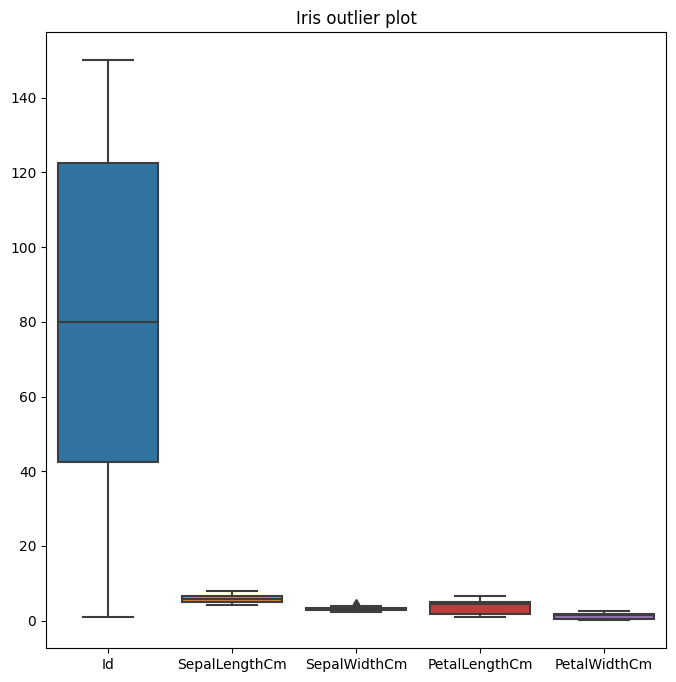

In [104]:
plt.figure(figsize=(8,8))
sns.boxplot(Iris)
plt.title('Iris outlier plot') 
plt.show()


- Detect the outlier in SepalWidthCm , outlier affect the distribution & model also we can remove the outlier

  usin Inter quantile range method to caping the outlier 

<Axes: >

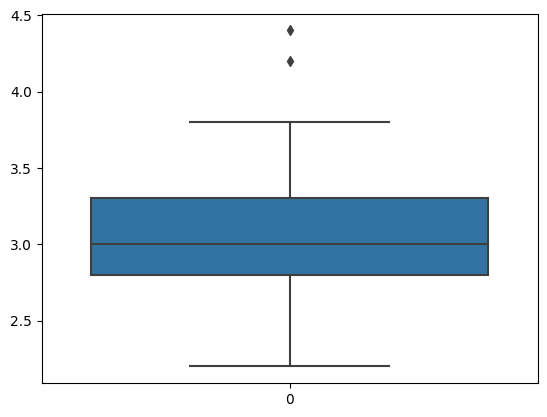

In [105]:
sns.boxplot(Iris["SepalWidthCm"])

In [106]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,79.546667,5.897333,3.033333,3.870667,1.240000
std,45.127535,0.826090,0.426910,1.681198,0.738516
min,1.000000,4.300000,2.200000,1.100000,0.100000
25%,42.500000,5.100000,2.800000,1.650000,0.400000
50%,80.000000,5.900000,3.000000,4.500000,1.400000
75%,122.500000,6.500000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.700000,2.500000


# IQR[Inter Quantile Range]Method

In [107]:
q1=Iris['SepalWidthCm'].quantile(0.25)
q1

2.8

In [108]:
q3=Iris['SepalWidthCm'].quantile(0.75)
q3

3.3

In [109]:
IQR=q3-q1
IQR

0.5

In [110]:
lower_range=q1-1.5*IQR
lower_range 

2.05

In [111]:
upper_range=q3+(1.5*IQR)
upper_range 

4.05

# IQR Capping 
- In capping methods outlier data can be dump into q1 to q3  range of IQR 

In [112]:
# where(condition, [x, y], /) .Return elements chosen from `x` or `y` depending on `condition`.
Iris['SepalWidthCm']=np.where(Iris['SepalWidthCm']<lower_range,lower_range,
                     np.where(Iris['SepalWidthCm']>upper_range,upper_range,
                              Iris['SepalWidthCm']))
Iris['SepalWidthCm']

0     2.40
1     3.10
2     3.00
3     3.40
4     3.00
5     2.60
6     2.80
7     3.20
8     3.00
9     3.00
10    2.80
11    3.10
12    2.80
13    3.40
14    2.50
15    3.60
16    2.30
17    3.40
18    2.30
19    2.50
20    3.30
21    3.20
22    2.70
23    3.70
24    3.50
25    2.80
26    2.80
27    2.40
28    2.80
29    2.80
30    3.10
31    3.00
32    3.30
33    3.80
34    3.40
35    3.00
36    3.20
37    4.05
38    3.10
39    3.10
40    3.40
41    2.30
42    2.90
43    3.00
44    2.80
45    3.00
46    3.10
47    2.90
48    2.80
49    2.20
50    2.60
51    3.40
52    3.00
53    3.40
54    2.90
55    2.50
56    3.10
57    2.20
58    2.90
59    2.50
60    3.00
61    3.10
62    3.10
63    3.30
64    3.00
65    3.00
66    4.05
67    3.00
68    3.80
69    3.00
70    3.30
71    3.20
72    3.70
73    2.80
74    3.50
Name: SepalWidthCm, dtype: float64

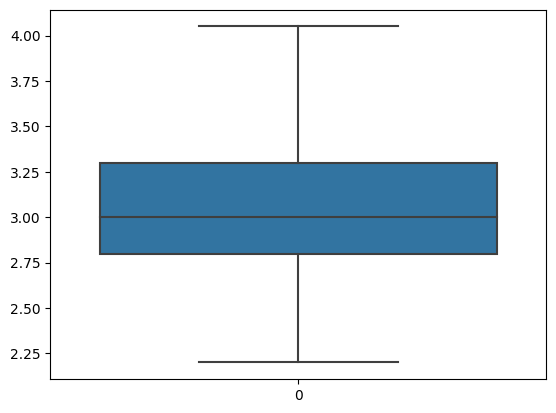

In [113]:
# After remove the outlier in SepalWidthCm
sns.boxplot(Iris["SepalWidthCm"])
plt.show()

# Feature Engineer

# Data split 

In [114]:
data=Iris.copy()
X=data.drop('Species',axis=1).copy()
Y=data['Species'].copy()


In [115]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,58,4.9,2.40,3.3,1.0
1,66,6.7,3.10,4.4,1.4
2,92,6.1,3.00,4.6,1.4
3,25,4.8,3.40,1.9,0.2
4,148,6.5,3.00,5.2,2.0
5,135,6.1,2.60,5.6,1.4
6,134,6.3,2.80,5.1,1.5
7,111,6.5,3.20,5.1,2.0
8,130,7.2,3.00,5.8,1.6
9,146,6.7,3.00,5.2,2.3


In [116]:
Y=Y.replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})
Y

0     0
1     0
2     0
3     1
4     2
5     2
6     2
7     2
8     2
9     2
10    0
11    1
12    2
13    1
14    0
15    1
16    0
17    2
18    0
19    2
20    1
21    0
22    0
23    1
24    1
25    0
26    0
27    0
28    2
29    2
30    2
31    0
32    1
33    2
34    1
35    2
36    0
37    1
38    2
39    0
40    1
41    0
42    1
43    2
44    2
45    1
46    1
47    0
48    2
49    2
50    0
51    1
52    2
53    1
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    2
62    2
63    2
64    2
65    0
66    1
67    2
68    1
69    0
70    0
71    1
72    1
73    2
74    1
Name: Species, dtype: int64

# Feature Scaling 


In [117]:
# MinMaxScaler
min_scaler=MinMaxScaler()
min_Species=min_scaler.fit(X)
min_Species

MinMaxScaler()

In [118]:
jb.dump(min_Species,'D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_min_Species_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_min_Species_model.pkl']

In [119]:
min_Species=min_scaler.transform(X)
min_species_df=pd.DataFrame(min_Species,columns=X.columns)
min_species_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.382550,0.166667,0.108108,0.392857,0.375000
1,0.436242,0.666667,0.486486,0.589286,0.541667
2,0.610738,0.500000,0.432432,0.625000,0.541667
3,0.161074,0.138889,0.648649,0.142857,0.041667
4,0.986577,0.611111,0.432432,0.732143,0.791667
5,0.899329,0.500000,0.216216,0.803571,0.541667
6,0.892617,0.555556,0.324324,0.714286,0.583333
7,0.738255,0.611111,0.540541,0.714286,0.791667
8,0.865772,0.805556,0.432432,0.839286,0.625000
9,0.973154,0.666667,0.432432,0.732143,0.916667


In [120]:
min_species_df.to_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/process/min_Species_df.csv',index=False)

In [121]:
#StandardScaler 
Standard_Scaler=StandardScaler()
Standard_Species=Standard_Scaler.fit(min_species_df)
Standard_Species

StandardScaler()

In [122]:
jb.dump(Standard_Species,'D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_Standard_Species_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_Standard_Species_model.pkl']

In [123]:
Standard_Species=Standard_Scaler.transform(min_species_df)
Standard_Species_df=pd.DataFrame(Standard_Species,columns=min_species_df.columns)
Standard_Species_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.480677,-1.215423,-1.546082,-0.341726,-0.327165
1,-0.302208,0.978188,0.180924,0.316975,0.218110
2,0.277817,0.246984,-0.065791,0.436739,0.218110
3,-1.216862,-1.337291,0.921070,-1.180074,-1.417713
4,1.527101,0.734454,-0.065791,0.796031,1.036021
5,1.237089,0.246984,-1.052652,1.035559,0.218110
6,1.214780,0.490719,-0.559221,0.736149,0.354428
7,0.701681,0.734454,0.427640,0.736149,1.036021
8,1.125545,1.587525,-0.065791,1.155323,0.490747
9,1.482484,0.978188,-0.065791,0.796031,1.444977


In [124]:
# Split the data for model training 
x_train,x_test,y_train,y_test=train_test_split(Standard_Species_df,Y,train_size=0.3,random_state=42)

In [125]:
#X_train,Y_train
x_train.to_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/raw/x_train.csv',index=False)
y_train.to_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/raw/y_train.csv',index=False)
#X_test,Y_test
x_test.to_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/Evaluate/raw/x_test.csv',index=False)
y_test.to_csv('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/Evaluate/raw/y_test.csv',index=False)

# Model Training

In [126]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [127]:
print('Train score:',svm_model.score(x_train,y_train)* 100)

Train score: 90.9090909090909


In [128]:
svm_model = SVC(C=1.0,kernel='poly',gamma='auto')
svm_model.fit(x_train, y_train)

SVC(gamma='auto', kernel='poly')

In [129]:
jb.dump(svm_model,'D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/svm_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/svm_model.pkl']

In [130]:
print('Train score:',svm_model.score(x_train,y_train)* 100)

Train score: 90.9090909090909


# Prediction

In [131]:
MinMaxScaler_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_min_Species_model.pkl')
StandardScaler_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_Standard_Species_model.pkl')
model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/svm_model.pkl')


In [132]:
print('Train score:',svm_model.score(x_test,y_test)* 100)


Train score: 86.79245283018868


In [133]:
y_pred=pd.DataFrame(model.predict(x_test)).copy()
Y_pred=y_pred.replace({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
Y_pred=Y_pred.rename(columns={0: 'Species'})
Y_pred

,Species
0,Iris-virginica
1,Iris-virginica
2,Iris-versicolor
3,Iris-versicolor
4,Iris-virginica
5,Iris-virginica
6,Iris-virginica
7,Iris-virginica
8,Iris-versicolor
9,Iris-virginica


# Evaluation Metrics

In [134]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      1.00      1.00        14
           2       1.00      0.67      0.80        21

    accuracy                           0.87        53
   macro avg       0.91      0.89      0.88        53
weighted avg       0.90      0.87      0.87        53



In [135]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 7,  0, 14]], dtype=int64)

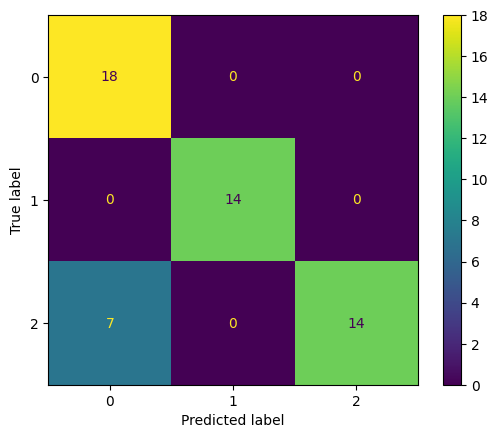

In [136]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()  
plt.show()



- **In conclusion, our Iris flower classification model achieved remarkable results with a traning of 90% and an prediction accuracy of 86%**
This demonstrates the effectiveness of machine learning techniques in accurately categorizing Iris flowers based on their morphological features
The findings of this study contribute to the growing body of knowledge in the field of machine learning and provide a reliable solution for
Irisflower species classification.Further research could explore additional optimization techniques and the applicability of the model to real-world scenarios.